In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Clustering as Data Exploration

In [2]:
# Loading the data
import pandas as pd
data = pd.read_csv('fashion-mnist_train-1.csv')
data.head()
data.isnull().sum().sum()
data.drop_duplicates(inplace=True)
data.shape
X = data.drop('label',axis=1)
y = data.label
#It is a large data set so use only 1500 observations to make your life easier.
X = X.loc[0:1500,]
y = y.loc[0:1500,]

### Aglomerative CLustering

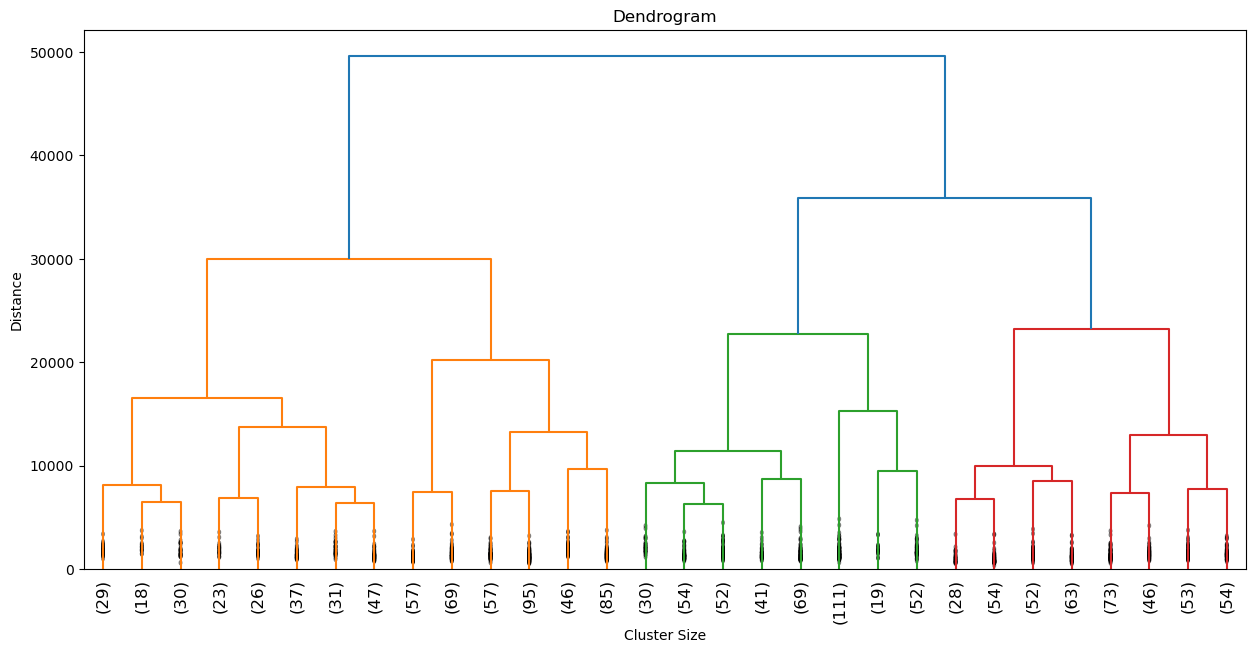

In [3]:
# Plot the dendrogram to see how many clusters we should use
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the linkage matrix
Z = linkage(X, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [4]:
## The above dendogram shows that its best to use 4 clusters as the largest vertical distance without crossing any horizontal lines appears between 20,000 and 40,000.

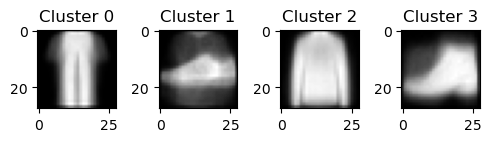

In [5]:
# Run Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering with 4 clusters
AC = AgglomerativeClustering(n_clusters=4, linkage='ward')
AC.fit(X)

# Plot the cluster centers as images
f, axes = plt.subplots(nrows=1, ncols=4, figsize=(5, 15))

for i in range(4):
    ax = axes.flat[i]
    mask = AC.labels_ == i
    array = np.reshape(np.array(X[mask].mean()), (28, 28))
    ax.imshow(array, cmap='gray')
    ax.set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()

In [6]:
## The first cluster looks a like a pant or a t-shirt. The second cluster looks like a shoe or slightly like a tshirt.
## The third cluster looks like a sweatshirt or a sweater. The last cluster looks like a boot.

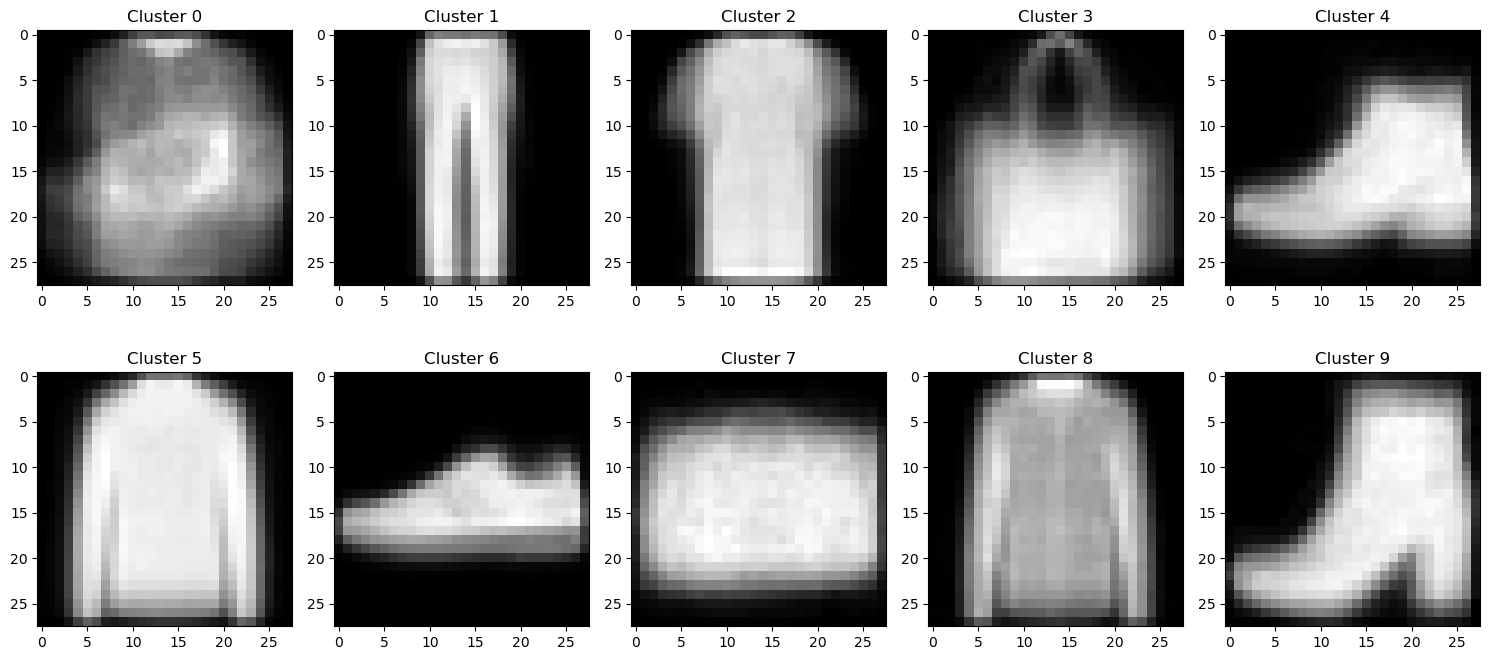

In [7]:
# Run Agglomerative Clustering
# Perform Agglomerative Clustering with 10 clusters
AC = AgglomerativeClustering(n_clusters=10, linkage='ward')
AC.fit(X)

# Plot the cluster centers as images
f, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))

for i in range(10):
    ax = axes.flat[i]
    mask = AC.labels_ == i
    array = np.reshape(np.array(X[mask].mean()), (28, 28))
    ax.imshow(array, cmap='gray')
    ax.set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()

In [8]:
## Cluster1: Very unclear but slightly looks like a tshirt or a shoe.
## Cluster2: Looks like a pair of pants.
## Cluster3: Looks like a tshirt.
## Cluster4: Looks like a bag or a purse.
## Cluster5: Looks like a boot.
## Cluster6: Looks like a sweater or a sweatshirt.
## Cluster7: Looks like a casual shoe.
## Cluster8: Very unclear but probably looks like a suitcase.
## Cluster9: Looks like a button downed shirt.
## Cluster10: Looks like womens boots.

In [9]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering with 4 clusters
AC_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
AC_4.fit(X)

# Compute Rand Score for 4 clusters
rand_score_4_clusters = adjusted_rand_score(y, AC_4.labels_)

# Perform Agglomerative Clustering with 10 clusters
AC_10 = AgglomerativeClustering(n_clusters=10, linkage='ward')
AC_10.fit(X)

# Compute Rand Score for 10 clusters
rand_score_10_clusters = adjusted_rand_score(y, AC_10.labels_)

# Output the Rand scores
rand_score_4_clusters, rand_score_10_clusters

(0.2515878937511306, 0.31968285875266045)

In [10]:
## A score of 0.252 shows that the clusters partially align with the true labels, but a considerable amount of the label structure is missed.
## The score improves to 0.3197 when using 10 clusters, indicating a better match between the clusters and the true labels compared to the 4-cluster scenario.

## Gausian Mixture Model

In [11]:
# Perform GMM clustering 1
from sklearn.mixture import GaussianMixture

# Perform GMM Clustering with 4 components for scenario 1
gmm_1 = GaussianMixture(n_components=4, random_state=34)
gmm_labels_1 = gmm_1.fit_predict(X)

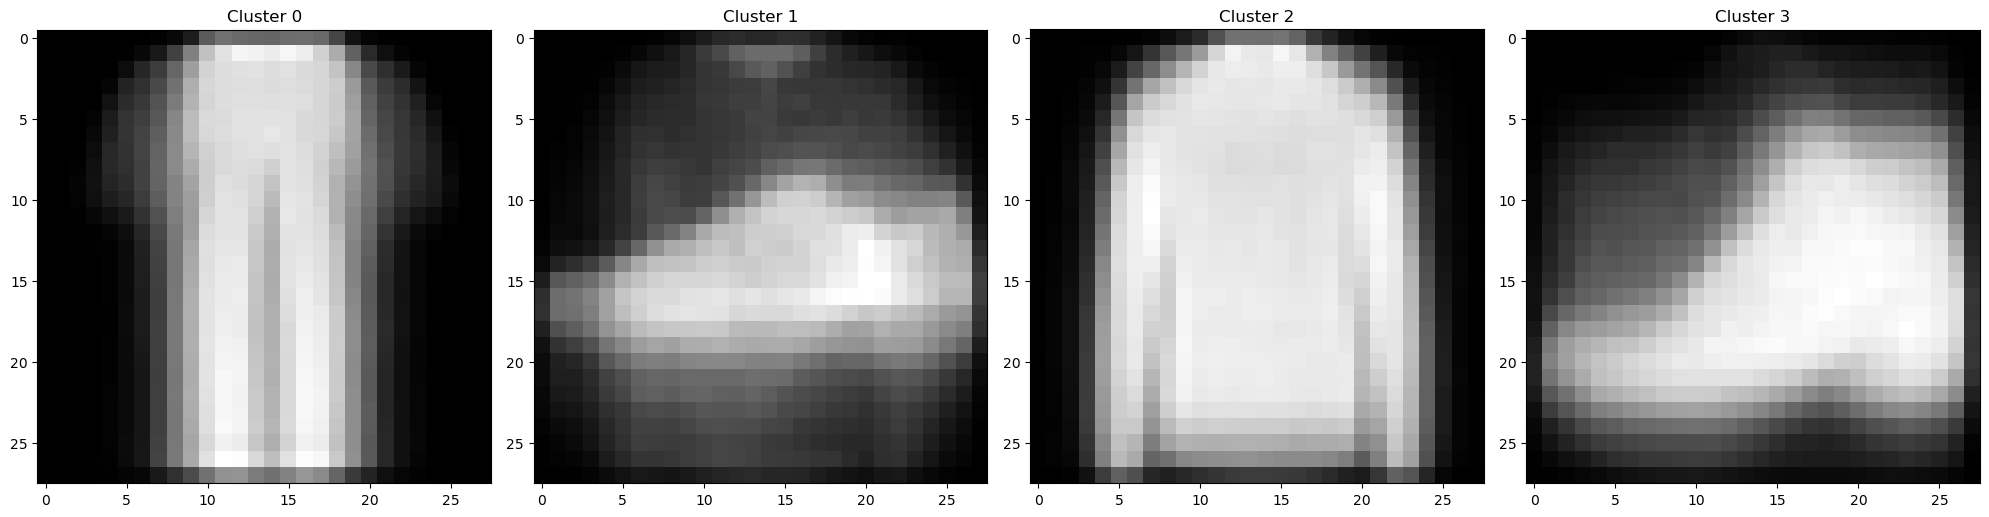

In [12]:
# Plot GMM clustering 1
# Plot the cluster centers as images for GMM clustering scenario 1 with 4 clusters
f, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

for i in range(4):
    ax = axes.flat[i]
    mask = gmm_labels_1 == i
    array = np.reshape(np.array(gmm_1.means_[i]), (28, 28))
    ax.imshow(array, cmap='gray')
    ax.set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()

In [13]:
#CLuster1: Looks like a sweater or a sweatshirt or a long-sleeve tshirt.
#Cluster2: Looks either like a long tshirt or a pair of pants.
#Cluster3: Looks like a boot.
#Cluster4: Looks like a casual shoe.

In [14]:
# Perform GMM clustering 2
# Perform GMM Clustering with 10 components for scenario 2
gmm_2 = GaussianMixture(n_components=10, random_state=34)
gmm_labels_2 = gmm_2.fit_predict(X)

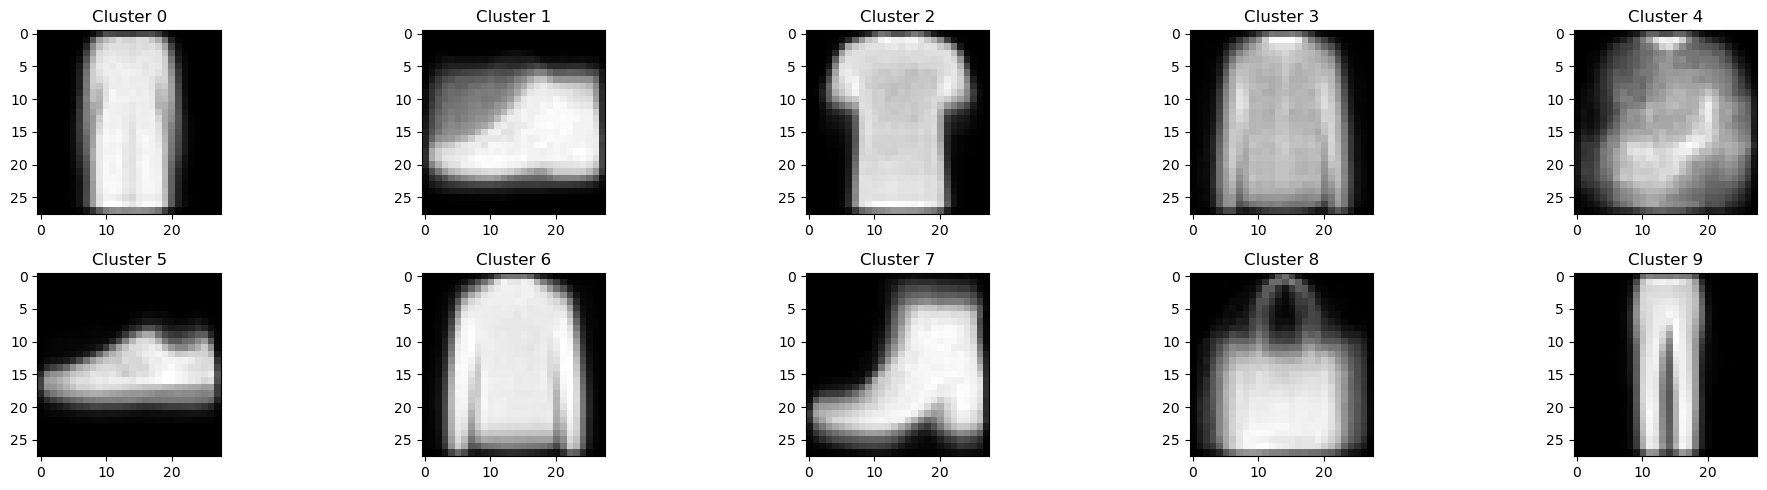

In [15]:
# Plot GMM clustering 2
# Plot the cluster centers as images for GMM clustering scenario 2 with 4 clusters
f, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 5))

for i in range(10):
    ax = axes.flat[i]
    mask = gmm_labels_2 == i
    array = np.reshape(np.array(gmm_2.means_[i]), (28, 28))
    ax.imshow(array, cmap='gray')
    ax.set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()

In [16]:
## Cluster1: Looks like a purse or a bag.
## Cluster2: Looks like a tshirt.
## Cluster3: Looks like a casual shoe.
## Cluster4: Looks like a very unclear image of a topwear.
## Cluster5: Looks like a slightly unclear image of a sweater/sweatshirt/long-sleeve tshirt.
## Cluster6: Looks like a boot with a rectangle shaped image in the background.
## Cluster7: Looks like a sports shoe.
## Cluster8: Looks a slight unclear image of pants.
## Cluster9: Looks like a sweater/sweatshirt/long-sleeve tshirt.
## Cluster10: Looks like a high heeled boot.

In [17]:
# Compute Rand score for the both scenarios. 
rand_score_gmm_1 = adjusted_rand_score(y, gmm_labels_1)

rand_score_gmm_2 = adjusted_rand_score(y, gmm_labels_2)

rand_score_gmm_1, rand_score_gmm_2

(0.2309216102176186, 0.33103175191466505)

In [18]:
## A score of 0.228 implies some level of structure in the data that is being captured, but the clusters are not fully aligned with the true classes.
## When using 10 clusters, the Rand score is slightly higher at 0.283. This suggests that increasing the number of clusters has led to a slightly better alignment between the clusters and the true labels, but the improvement is incremental.

## DBScan

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the first set of hyperparameters
epsilon_1 = 10  # Adjust epsilon based on the scale of the data
min_samples_1 = 5

# Perform DBScan with the first set of hyperparameters
dbscan_1 = DBSCAN(eps=epsilon_1, min_samples=min_samples_1)
dbscan_labels_1 = dbscan_1.fit_predict(X_scaled)

# Get the unique number of clusters (including outliers)
num_clusters_1 = len(np.unique(dbscan_labels_1))

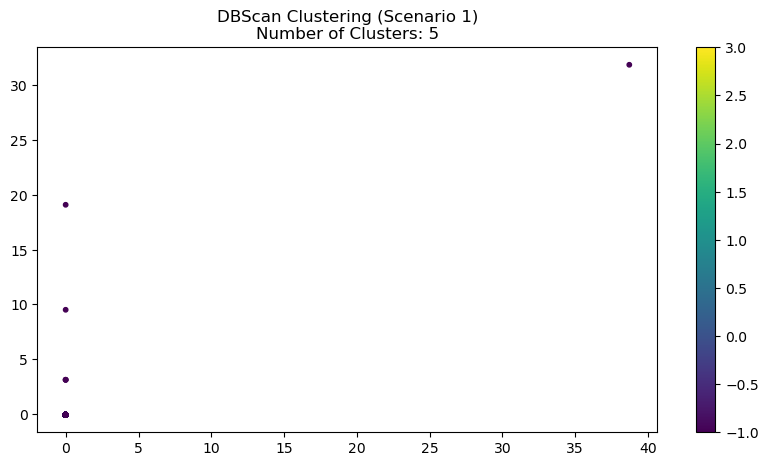

In [6]:
# Plot DBScan clustering scenario 1
f, axes = plt.subplots(figsize=(10, 5))

# Since DBScan can't have a predetermined number of clusters, we'll use colors to represent clusters
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels_1, cmap='viridis', s=10)
plt.colorbar(scatter)
plt.title(f'DBScan Clustering (Scenario 1)\nNumber of Clusters: {num_clusters_1}')
plt.show()

In [22]:
# Define the second set of hyperparameters
epsilon_2 = 15  # Adjust epsilon based on the scale of the data
min_samples_2 = 10

# Perform DBScan with the second set of hyperparameters
dbscan_2 = DBSCAN(eps=epsilon_2, min_samples=min_samples_2)
dbscan_labels_2 = dbscan_2.fit_predict(X_scaled)

# Get the unique number of clusters (including outliers)
num_clusters_2 = len(np.unique(dbscan_labels_2))

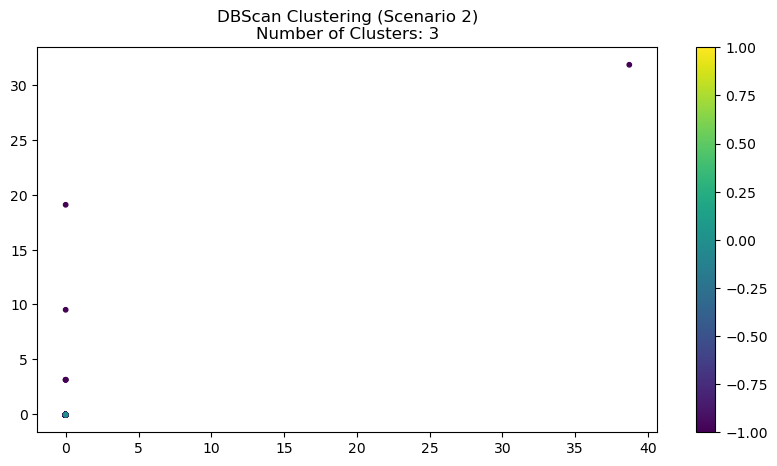

In [23]:
# Plot DBScan clustering scenario 2
f, axes = plt.subplots(figsize=(10, 5))

# Since DBScan can't have a predetermined number of clusters, we'll use colors to represent clusters
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels_2, cmap='viridis', s=10)
plt.colorbar(scatter)
plt.title(f'DBScan Clustering (Scenario 2)\nNumber of Clusters: {num_clusters_2}')
plt.show()

In [24]:
# Compute Rand Score for DBScan clustering scenario 1
from sklearn.metrics import adjusted_rand_score

# Compute Rand Score for DBScan clustering scenario 1
rand_score_dbscan_1 = adjusted_rand_score(y, dbscan_labels_1)

rand_score_dbscan_1

0.003903195435456794

In [25]:
# Compute Rand Score for DBScan clustering scenario 2
rand_score_dbscan_2 = adjusted_rand_score(y, dbscan_labels_2)

rand_score_dbscan_2

0.04591568198646604

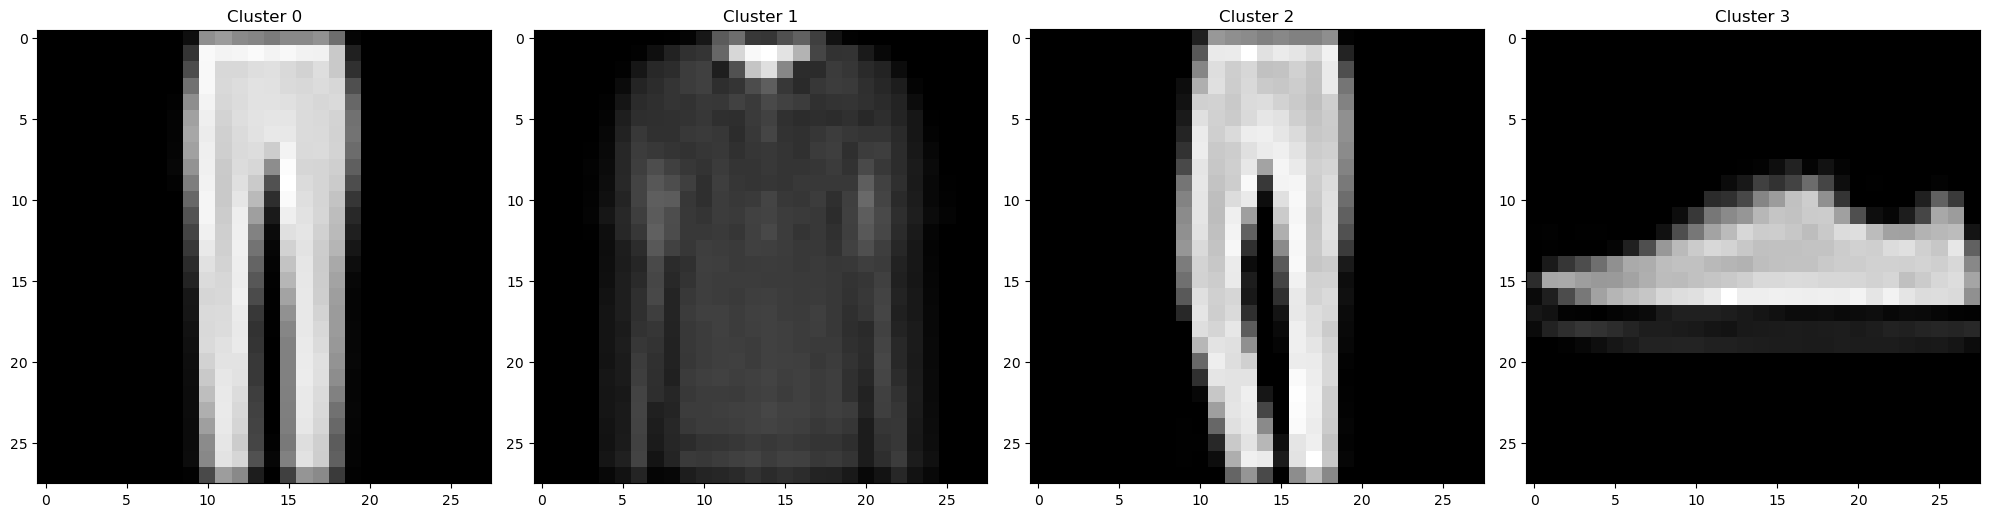

In [26]:
#Plotting as per taught in class:

# Plot the cluster centers as images
f, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

for i in range(4):
    ax = axes.flat[i]
    mask = dbscan_1.labels_ == i
    array = np.reshape(np.array(X[mask].mean()), (28, 28))
    ax.imshow(array, cmap='gray')
    ax.set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()

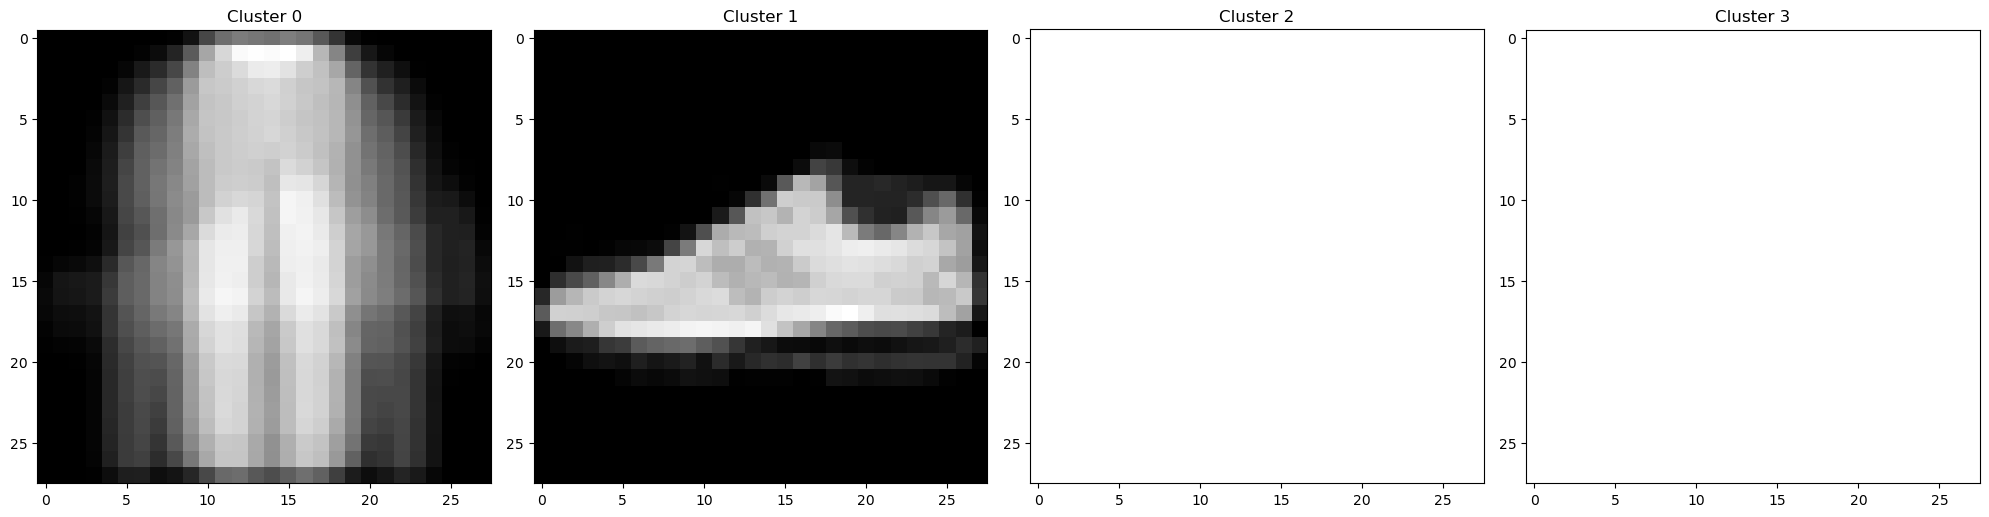

In [27]:
# Plot the cluster centers as images
f, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

for i in range(4):
    ax = axes.flat[i]
    mask = dbscan_2.labels_ == i
    array = np.reshape(np.array(X[mask].mean()), (28, 28))
    ax.imshow(array, cmap='gray')
    ax.set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()

In [27]:
# A Rand Score of approximately 0.0039 for a DBScan clustering result suggests that the clustering performed by DBScan is not very accurate
# compared to the ground truth labels.

# A Rand Score of approximately 0.0459 for a DBScan clustering result suggests that the clustering performed by DBScan is still not very accurate
# compared to the ground truth labels, but it indicates a slightly better agreement than a lower Rand Score.

## Image Compression using K-means

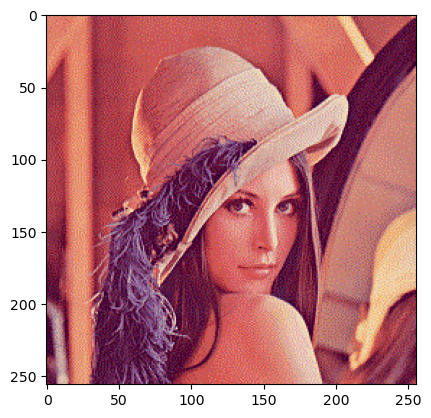

In [2]:
# Let's load the image
from matplotlib.image import imread
import matplotlib.pyplot as plt
img = imread('lena_color.gif')
plt.imshow(img)
plt.show()

In [3]:
# This is the image size
img_size = img.shape
img_size

(256, 256, 4)

In [4]:
print(img)

[[[204 128 102 255]
  [255 128 153 255]
  [204 128 102 255]
  ...
  [204 128 153 255]
  [255 170 102 255]
  [204  85 102 255]]

 [[204 128 102 255]
  [255 128 153 255]
  [204 128 102 255]
  ...
  [255 170 102 255]
  [204 128 153 255]
  [204 128 102 255]]

 [[255 128 153 255]
  [204 128 102 255]
  [204 128 102 255]
  ...
  [255 128 153 255]
  [204 128 102 255]
  [204  85  51 255]]

 ...

 [[102   0  51 255]
  [ 51  43  51 255]
  [102   0  51 255]
  ...
  [153  85 102 255]
  [153  43  51 255]
  [153  85  51 255]]

 [[ 51  43  51 255]
  [102   0  51 255]
  [102   0  51 255]
  ...
  [153  43  51 255]
  [204  85 102 255]
  [153  43  51 255]]

 [[102   0  51 255]
  [102  43 102 255]
  [102  43  51 255]
  ...
  [153  43 102 255]
  [153  85  51 255]
  [204  85 102 255]]]


In [5]:
# Reshape it to be 2-dimensional
X = img.reshape(img_size[0] * img_size[1], img_size[2])
print(X.shape)

(65536, 4)


In [7]:
# Run K-Means on this reshaped data set with 10 clusters. 
# Name your model ***compressed***.

# Import necessary libraries
from sklearn.cluster import KMeans
import numpy as np

# Set number of clusters
k = 10

# Run K-means clustering on the pixel values (X)
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster centers (these are the RGB values of the 10 colors)
cluster_centers = kmeans.cluster_centers_

# Get the labels for each pixel
labels = kmeans.labels_

# Replace each pixel by the center of its cluster
compressed = cluster_centers[labels]
compressed = np.clip(compressed.astype('uint8'), 0, 255)

# Reshape the compressed image back to the original image size
compressed = compressed.reshape(img_size)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


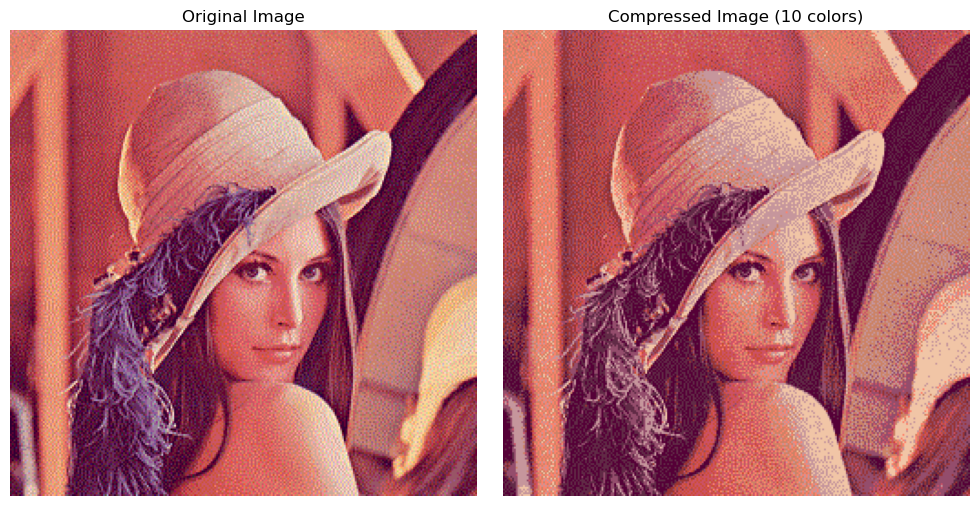

In [8]:
# Plot original image and compressed image side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Display the compressed image
ax[1].imshow(compressed)
ax[1].set_title('Compressed Image (10 colors)')
ax[1].axis('off')

# Show both images
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


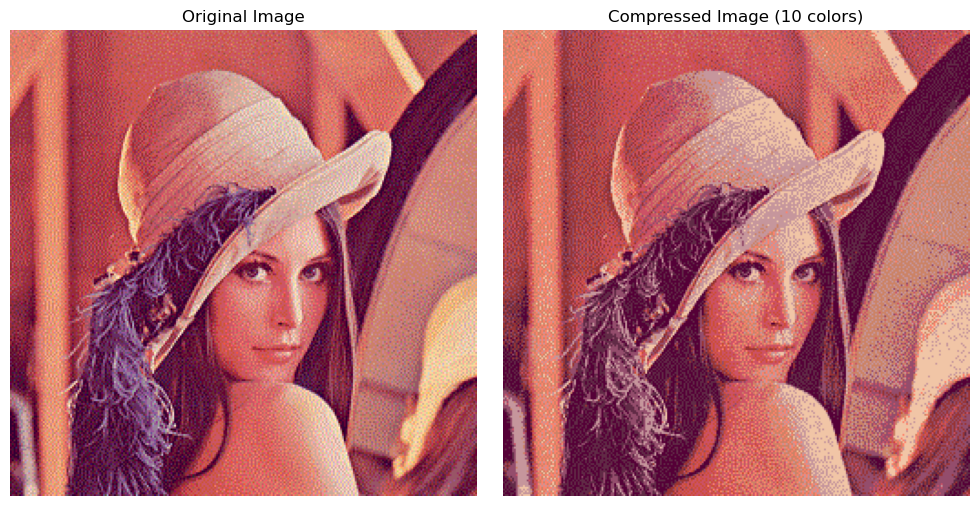

In [9]:
# Use the centroids to compress the image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread

# Load the image
img = imread('lena_color.gif')

# Get the image size
img_size = img.shape

# Reshape the image into a 2D array of pixels (each pixel is an RGB triplet)
X = img.reshape(img_size[0] * img_size[1], img_size[2])

# Run K-means with 10 clusters
k = 10
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Get the labels for each pixel (which cluster each pixel belongs to)
labels = kmeans.labels_

# Replace each pixel with its corresponding centroid
compressed_img = centroids[labels]
compressed_img = np.clip(compressed_img.astype('uint8'), 0, 255)

# Reshape the compressed image back to the original shape
compressed_img = compressed_img.reshape(img_size)

# Display the original and compressed images side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Show original image
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Show compressed image
ax[1].imshow(compressed_img)
ax[1].set_title('Compressed Image (10 colors)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

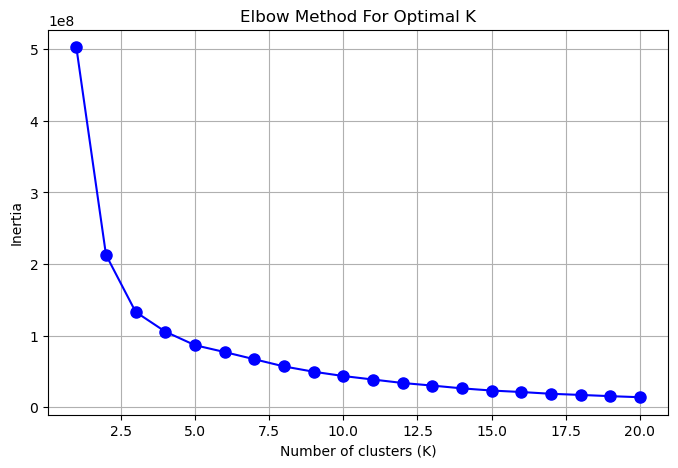

In [10]:
# Finding best K value using inertia(elbow method)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define a range of K values to test
K_values = range(1, 21)  # You can adjust the upper limit of K
inertias = []

# Loop over the range of K values and store the inertia for each K
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

# Plot the inertia values for each K to visualize the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertias, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


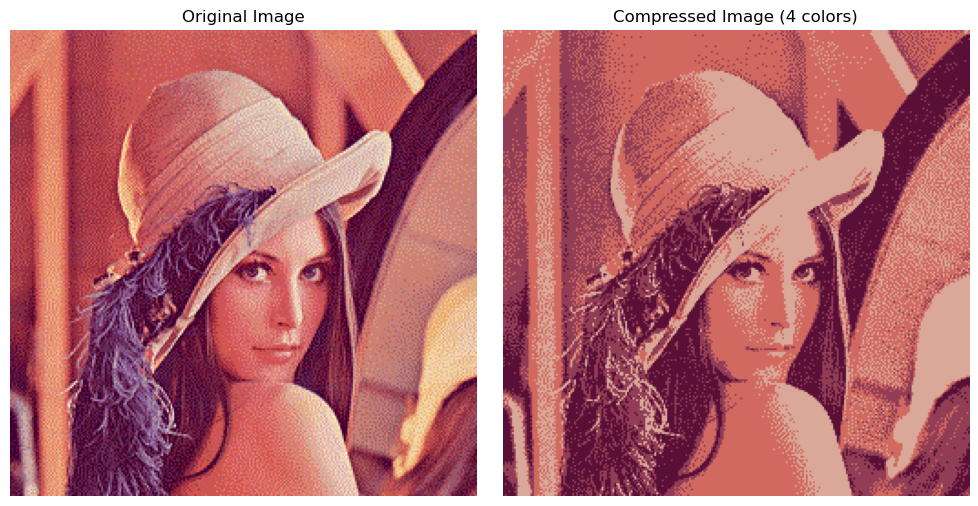

In [11]:
# Use the optimal K value of 4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(X)

# Get the cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Get the labels for each pixel
labels = kmeans.labels_

# Replace each pixel with its corresponding centroid
compressed_img = centroids[labels]
compressed_img = np.clip(compressed_img.astype('uint8'), 0, 255)

# Reshape the compressed image back to the original shape
compressed_img = compressed_img.reshape(img_size)

# Display the original and compressed images side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Show original image
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Show compressed image with optimal K
ax[1].imshow(compressed_img)
ax[1].set_title(f'Compressed Image ({optimal_k} colors)')
ax[1].axis('off')

plt.tight_layout()
plt.show()